In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.metrics import classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

%matplotlib inline

In [6]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [7]:
train.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required,Downloads
0,ps_id-24654,Finance,4.18,1481,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device,"100,000+"
1,ps_id-35329,Music And Audio,4.81,302,10M,Free,Everyone,Mar 26 2020,3.9.18,4.1 and up,"5,000+"
2,ps_id-11044,Game Casual,4.27,374,27M,Free,Everyone,May 01 2020,1.10.1,4.1 and up,"10,000+"
3,ps_id-36068,Business,4.03,122058,Varies with device,Free,Teen,May 02 2020,Varies with device,Varies with device,"10,000,000+"
4,ps_id-35831,Medical,4.60,358,Varies with device,297.5742,Everyone,Nov 29 2018,Varies with device,Varies with device,"5,000+"


In [8]:
test.head()

,Offered_By,Category,Rating,Reviews,Size,Price,Content_Rating,Last_Updated_On,Release_Version,OS_Version_Required
0,ps_id-18231,Game Puzzle,4.52,1362,36M,Free,Everyone,May 05 2020,1.4.1,4.0.3 and up
1,ps_id-1874,Shopping,4.29,3353,Varies with device,Free,Teen,May 05 2020,Varies with device,Varies with device
2,ps_id-3182,Photography,4.55,161855,Varies with device,Free,Everyone,May 05 2020,Varies with device,Varies with device
3,ps_id-31452,Game Action,3.97,545,16M,Free,Everyone,Dec 07 2016,2,4.1 and up
4,ps_id-25641,Photography,4.65,1672,33M,Free,Everyone,Jan 25 2020,1,4.4 and up


In [9]:
train['Downloads'].unique()

array(['100,000+', '5,000+', '10,000+', '10,000,000+', '50,000+',
       '1,000,000+', '5,000,000+', '500,000+', '1,000+', '1,000,000,000+',
       '50,000,000+', '100+', '100,000,000+', '500+', '10+', '50+',
       '500,000,000+', '5,000,000,000+'], dtype=object)

In [23]:
train['Downloads'].value_counts()

100,000+          3158
1,000,000+        2707
10,000+           2239
500,000+          1360
10,000,000+       1277
50,000+           1243
1,000+            1221
5,000,000+         912
5,000+             763
100+               508
500+               364
100,000,000+       266
50,000,000+        247
10+                 91
50+                 84
500,000,000+        42
1,000,000,000+      33
5,000,000,000+       1
Name: Downloads, dtype: int64

In [10]:
train['Downloads'].nunique()

18

In [17]:
train['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [21]:
train['Content_Rating'].value_counts()

Everyone           13895
Teen                1590
Everyone 10+         596
Mature 17+           429
Adults only 18+        4
Unrated                2
Name: Content_Rating, dtype: int64

In [46]:
train['Size'].nunique()

439

In [47]:
train['Price'].nunique()

83

In [19]:
train['Category'].value_counts()

Education              1440
Tools                  1231
Entertainment           927
Books And Reference     741
Family                  686
Finance                 667
Lifestyle               659
Productivity            570
Music And Audio         526
Business                521
Health And Fitness      441
Personalization         440
Game                    426
News And Magazines      413
Photography             408
Game Puzzle             398
Sports                  397
Shopping                378
Travel And Local        369
Communication           365
Medical                 326
Game Casual             287
Game Arcade             280
Social                  271
Game Action             235
Video Players           222
Food And Drink          222
Game Simulation         192
Game Card               192
Game Educational        179
Maps And Navigation     179
Game Role Playing       169
Game Strategy           166
Game Adventure          130
Auto And Vehicles       126
Game Sports         

In [22]:
train['Category'].nunique()

51

In [24]:
train.isnull().sum()

Offered_By             0
Category               0
Rating                 0
Reviews                0
Size                   0
Price                  0
Content_Rating         0
Last_Updated_On        0
Release_Version        0
OS_Version_Required    0
Downloads              0
dtype: int64

In [25]:
test.isnull().sum()

Offered_By             0
Category               0
Rating                 0
Reviews                0
Size                   0
Price                  0
Content_Rating         0
Last_Updated_On        0
Release_Version        0
OS_Version_Required    0
dtype: int64

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16516 entries, 0 to 16515
Data columns (total 11 columns):
Offered_By             16516 non-null object
Category               16516 non-null object
Rating                 16516 non-null float64
Reviews                16516 non-null int64
Size                   16516 non-null object
Price                  16516 non-null object
Content_Rating         16516 non-null object
Last_Updated_On        16516 non-null object
Release_Version        16516 non-null object
OS_Version_Required    16516 non-null object
Downloads              16516 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 1.4+ MB


In [14]:
df = pd.concat([train,test],axis=0)

C:\Users\Jayita\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [16]:
df

,Category,Content_Rating,Downloads,Last_Updated_On,OS_Version_Required,Offered_By,Price,Rating,Release_Version,Reviews,Size
0,Finance,Everyone,"100,000+",May 05 2020,Varies with device,ps_id-24654,Free,4.18,Varies with device,1481,Varies with device
1,Music And Audio,Everyone,"5,000+",Mar 26 2020,4.1 and up,ps_id-35329,Free,4.81,3.9.18,302,10M
2,Game Casual,Everyone,"10,000+",May 01 2020,4.1 and up,ps_id-11044,Free,4.27,1.10.1,374,27M
3,Business,Teen,"10,000,000+",May 02 2020,Varies with device,ps_id-36068,Free,4.03,Varies with device,122058,Varies with device
4,Medical,Everyone,"5,000+",Nov 29 2018,Varies with device,ps_id-35831,297.5742,4.60,Varies with device,358,Varies with device
5,Books And Reference,Everyone,"10,000+",Feb 05 2019,4.1 and up,ps_id-17918,Free,4.80,3,40,2.3M
6,Finance,Everyone,"50,000+",Jul 25 2019,5.0 and up,ps_id-11727,Free,4.60,3000.5.3532,1992,24M
7,Tools,Everyone,"1,000,000+",May 05 2020,4.4 and up,ps_id-4496,Free,4.62,1.28.1,37975,20M
8,Finance,Everyone,"10,000+",Mar 01 2019,4.0 and up,ps_id-9590,Free,3.20,4.5.6,191,10M
9,Game,Everyone,"10,000,000+",Sep 29 2016,4.0 and up,ps_id-7167,Free,4.10,1.31,349503,19M


In [27]:
df.Category.nunique()

51

In [28]:
# convert to categorical Categority by using one hot technique 
df_dummy = df.copy()
df_dummy.Category = pd.Categorical(df_dummy.Category)

x = df_dummy[['Category']]
del df_dummy['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
df_dummy = pd.concat([df_dummy,dummies], axis=1)
df_dummy.head()

,Content_Rating,Downloads,Last_Updated_On,OS_Version_Required,Offered_By,Price,Rating,Release_Version,Reviews,Size,...,Category_Personalization,Category_Photography,Category_Productivity,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel And Local,Category_Video Players,Category_Weather
0,Everyone,"100,000+",May 05 2020,Varies with device,ps_id-24654,Free,4.18,Varies with device,1481,Varies with device,...,0,0,0,0,0,0,0,0,0,0
1,Everyone,"5,000+",Mar 26 2020,4.1 and up,ps_id-35329,Free,4.81,3.9.18,302,10M,...,0,0,0,0,0,0,0,0,0,0
2,Everyone,"10,000+",May 01 2020,4.1 and up,ps_id-11044,Free,4.27,1.10.1,374,27M,...,0,0,0,0,0,0,0,0,0,0
3,Teen,"10,000,000+",May 02 2020,Varies with device,ps_id-36068,Free,4.03,Varies with device,122058,Varies with device,...,0,0,0,0,0,0,0,0,0,0
4,Everyone,"5,000+",Nov 29 2018,Varies with device,ps_id-35831,297.5742,4.60,Varies with device,358,Varies with device,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_dummy = df_dummy.drop(['Offered_By','OS_Version_Required','Release_Version'],1)

In [36]:
df_dummy.head()

,Content_Rating,Downloads,Last_Updated_On,Price,Rating,Reviews,Size,Category_Art And Design,Category_Auto And Vehicles,Category_Beauty,...,Category_Personalization,Category_Photography,Category_Productivity,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel And Local,Category_Video Players,Category_Weather
0,Everyone,"100,000+",May 05 2020,Free,4.18,1481,Varies with device,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Everyone,"5,000+",Mar 26 2020,Free,4.81,302,10M,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Everyone,"10,000+",May 01 2020,Free,4.27,374,27M,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Teen,"10,000,000+",May 02 2020,Free,4.03,122058,Varies with device,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Everyone,"5,000+",Nov 29 2018,297.5742,4.60,358,Varies with device,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
from sklearn.preprocessing import LabelEncoder
train['downloads'] = LabelEncoder().fit_transform(train['Downloads'])
target = train['downloads']

In [72]:
target.unique(),target.nunique(),target.value_counts()

(array([ 7,  9,  4,  5, 13,  1, 10, 16,  0,  2, 14,  6,  8, 15,  3, 12, 17,
        11], dtype=int64), 18, 7     3158
 1     2707
 4     2239
 16    1360
 5     1277
 13    1243
 0     1221
 10     912
 9      763
 6      508
 15     364
 8      266
 14     247
 3       91
 12      84
 17      42
 2       33
 11       1
 Name: downloads, dtype: int64)

In [63]:
target.head()

0    7
1    9
2    4
3    5
4    9
Name: downloads, dtype: int32

In [62]:
target.shape

(16516,)

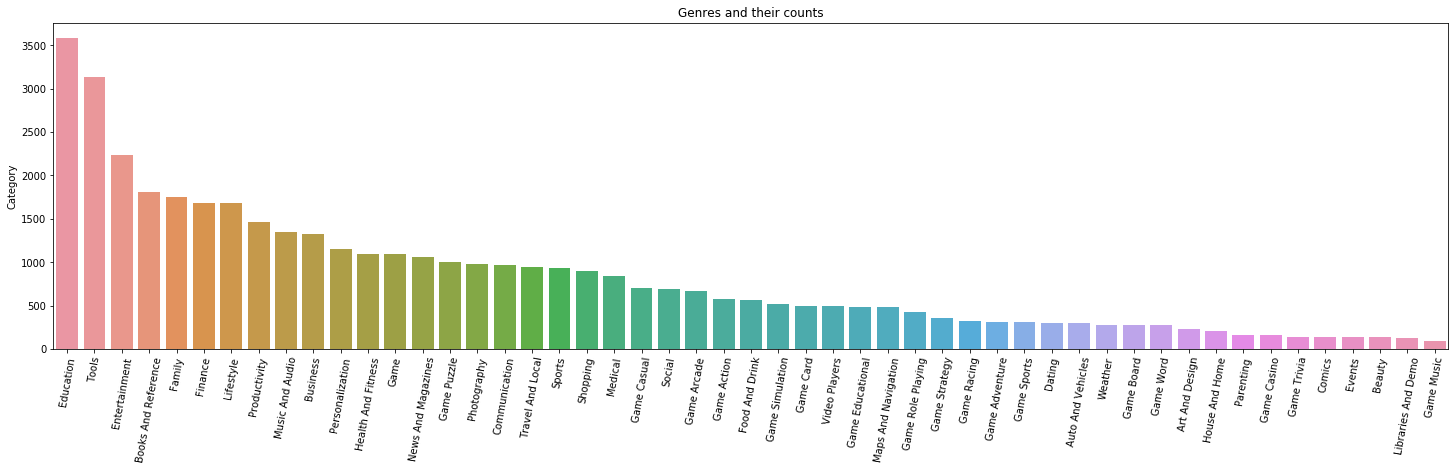

In [51]:
plt.figure(figsize=(25,6))
sns.barplot(x=df.Category.value_counts().index,y=df.Category.value_counts())
plt.xticks(rotation=80)
plt.title("Genres and their counts")
plt.show()


In [53]:
np.sort(df.Category.value_counts())


array([  97,  128,  132,  136,  138,  143,  158,  159,  204,  224,  271,
        271,  275,  295,  297,  305,  315,  319,  362,  421,  485,  488,
        490,  496,  517,  566,  572,  669,  689,  707,  839,  900,  931,
        947,  962,  979, 1002, 1058, 1094, 1098, 1151, 1327, 1342, 1464,
       1682, 1687, 1746, 1812, 2232, 3130, 3580], dtype=int64)

In [55]:
#object(string) values transform to ordinal in Content Rating Feature without nan
df = df_dummy.copy()
df['Content_Rating'] = df['Content_Rating'].map({'Unrated':0.0,
                                                 'Everyone':1.0,
                                                 'Everyone 10+':2.0,
                                                 'Teen':3.0,
                                                 'Adults only 18+':4.0,
                                                 'Mature 17+':5.0})
df['Content_Rating'] = df['Content_Rating'].astype(float)
df.head()


,Content_Rating,Downloads,Last_Updated_On,Price,Rating,Reviews,Size,Category_Art And Design,Category_Auto And Vehicles,Category_Beauty,...,Category_Personalization,Category_Photography,Category_Productivity,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel And Local,Category_Video Players,Category_Weather
0,1.0,"100,000+",May 05 2020,Free,4.18,1481,Varies with device,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,"5,000+",Mar 26 2020,Free,4.81,302,10M,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,"10,000+",May 01 2020,Free,4.27,374,27M,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,"10,000,000+",May 02 2020,Free,4.03,122058,Varies with device,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,"5,000+",Nov 29 2018,297.5742,4.60,358,Varies with device,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
from sklearn.preprocessing import LabelEncoder
df['Price_encoded'] = LabelEncoder().fit_transform(df['Price'])
df['Size_encoded']  = LabelEncoder().fit_transform(df['Size'])
df.head()

,Content_Rating,Downloads,Last_Updated_On,Price,Rating,Reviews,Size,Category_Art And Design,Category_Auto And Vehicles,Category_Beauty,...,Category_Productivity,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel And Local,Category_Video Players,Category_Weather,Price_encoded,Size_encoded
0,1.0,"100,000+",May 05 2020,Free,4.18,1481,Varies with device,0,0,0,...,0,0,0,0,0,0,0,0,128,702
1,1.0,"5,000+",Mar 26 2020,Free,4.81,302,10M,0,0,0,...,0,0,0,0,0,0,0,0,128,37
2,1.0,"10,000+",May 01 2020,Free,4.27,374,27M,0,0,0,...,0,0,0,0,0,0,0,0,128,175
3,3.0,"10,000,000+",May 02 2020,Free,4.03,122058,Varies with device,0,0,0,...,0,0,0,0,0,0,0,0,128,702
4,1.0,"5,000+",Nov 29 2018,297.5742,4.60,358,Varies with device,0,0,0,...,0,0,0,0,0,0,0,0,66,702


In [64]:
df = df.drop(['Downloads','Last_Updated_On','Price','Size'],1)
df.head()

,Content_Rating,Rating,Reviews,Category_Art And Design,Category_Auto And Vehicles,Category_Beauty,Category_Books And Reference,Category_Business,Category_Comics,Category_Communication,...,Category_Productivity,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel And Local,Category_Video Players,Category_Weather,Price_encoded,Size_encoded
0,1.0,4.18,1481,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,128,702
1,1.0,4.81,302,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,128,37
2,1.0,4.27,374,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,128,175
3,3.0,4.03,122058,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,128,702
4,1.0,4.60,358,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,66,702


In [66]:
X_train = df[:16516]
X_test  = df[16516:]

In [67]:
X_train.shape,target.shape,X_test.shape

((16516, 56), (16516,), (24776, 56))

In [70]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, target, train_size=0.8, test_size=0.2,
                                                                random_state=1)

In [74]:
model_1 = LGBMClassifier(learning_rate=0.01,
                            n_estimators=600, 
                            objective = 'multi:softmax',
                            num_class=18,
                            nthread=1) 

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model_1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.6f (%.6f)' % (mean(n_scores), std(n_scores)))

model_1.fit(X_train, y_train) 

model_1.score(X_train,y_train)

Accuracy: 0.551443 (0.008712)


0.6681804420224039

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        "num_leaves" : [10,20,30,40,50,60,70,80,90,100,150,200],
        }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search_1 = RandomizedSearchCV(model_1, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   n_jobs=4, 
                                   cv=skf.split(X_train,y_train),
                                   verbose=1,
                                   random_state=1001 )

In [ ]:
random_search_1.fit(X_train,y_train)

In [75]:
predictions = model_1.predict(X_valid) 
print(classification_report(y_valid, predictions))

mae_1 = mean_absolute_error(predictions,y_valid) 

print("Mean Absolute Error:" , mae_1)

              precision    recall  f1-score   support

           0       0.50      0.67      0.57       248
           1       0.66      0.79      0.72       578
           2       0.67      1.00      0.80         4
           3       0.27      0.21      0.24        14
           4       0.56      0.75      0.64       446
           5       0.70      0.76      0.73       255
           6       0.56      0.61      0.58       119
           7       0.58      0.78      0.66       609
           8       0.81      0.68      0.74        57
           9       0.41      0.09      0.14       148
          10       0.46      0.24      0.32       174
          11       0.00      0.00      0.00         1
          12       0.60      0.17      0.26        18
          13       0.48      0.11      0.18       242
          14       0.52      0.49      0.50        53
          15       0.28      0.13      0.18        62
          16       0.42      0.17      0.24       270
          17       0.75    

C:\Users\Jayita\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [77]:
pred_1 = model_1.predict(X_test)
pred_1 = np.array(pred_1).flatten()
pred_1[:10]

array([ 7,  7,  5,  7,  7,  4, 15,  1,  7,  5])

In [78]:
label = [np.argmax(i) for i in pred_1]
len(label)

24776

In [ ]:
y_data = LabelEncoder().fit_transform(target)
inv_y_data = LabelEncoder().inverse_transform(y_data.astype(int).ravel())


In [ ]:
final_target=le.fit(inv_y_data).inverse_transform(label)


In [ ]:
results_df = pd.DataFrame(data={'Offered_By':test['Offered_By'], 'Category':final_target})
results_df.to_csv('sub.csv', index=False)